<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/LogisticsRegression_HRAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

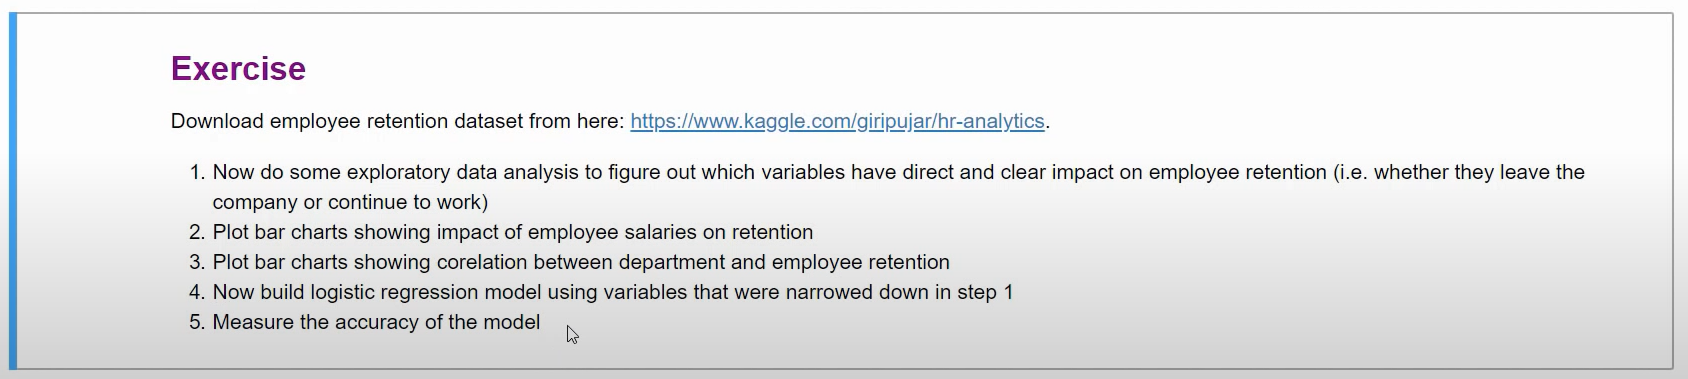

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/py-master/ML/7_logistic_reg/Exercise'

7_logistic_regression_exercise.ipynb  HR_comma_sep.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/py-master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle = df
dfle.Department = le.fit_transform(dfle.Department)
dfle.salary=le.fit_transform(dfle.salary)
dfle


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [19]:
x=dfle[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary']].values
y=dfle.left
x,y

(array([[0.38, 0.53, 2.  , ..., 0.  , 7.  , 1.  ],
        [0.8 , 0.86, 5.  , ..., 0.  , 7.  , 2.  ],
        [0.11, 0.88, 7.  , ..., 0.  , 7.  , 2.  ],
        ...,
        [0.37, 0.53, 2.  , ..., 0.  , 8.  , 1.  ],
        [0.11, 0.96, 6.  , ..., 0.  , 8.  , 1.  ],
        [0.37, 0.52, 2.  , ..., 0.  , 8.  , 1.  ]]), 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 14994    1
 14995    1
 14996    1
 14997    1
 14998    1
 Name: left, Length: 14999, dtype: int64)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [7,8])], remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x),dtype=np.str)

In [21]:
x

array([['0.0', '0.0', '0.0', ..., '3.0', '0.0', '0.0'],
       ['0.0', '0.0', '0.0', ..., '6.0', '0.0', '0.0'],
       ['0.0', '0.0', '0.0', ..., '4.0', '0.0', '0.0'],
       ...,
       ['0.0', '0.0', '0.0', ..., '3.0', '0.0', '0.0'],
       ['0.0', '0.0', '0.0', ..., '4.0', '0.0', '0.0'],
       ['0.0', '0.0', '0.0', ..., '3.0', '0.0', '0.0']], dtype='<U32')

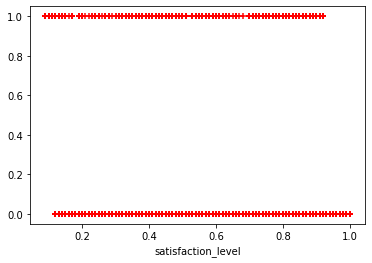

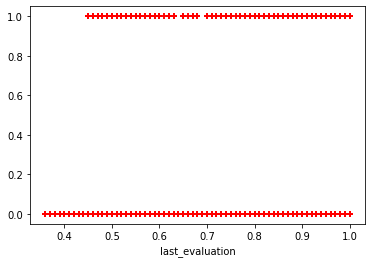

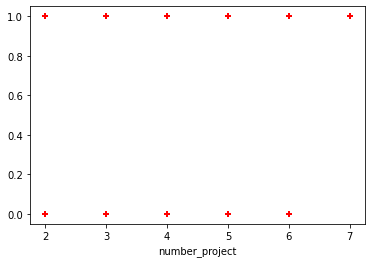

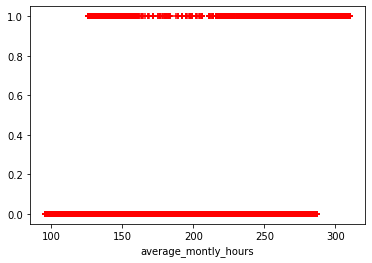

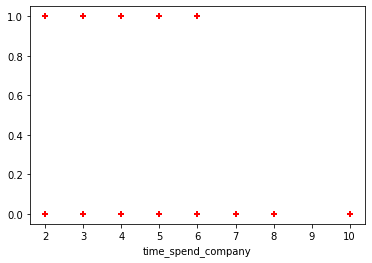

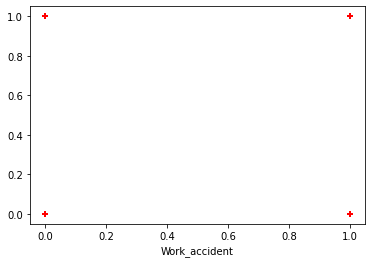

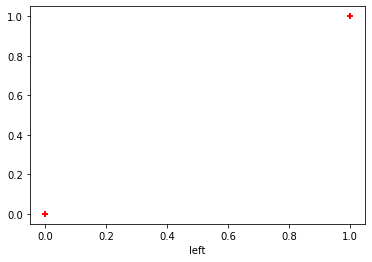

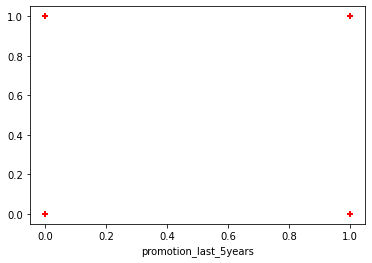

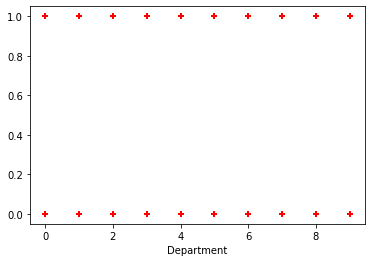

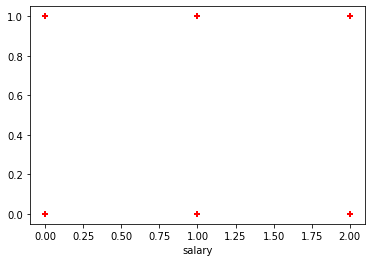

In [39]:
z=df.columns

for i in z:
  plt.xlabel(i)
  plt.scatter(df[[i]],df.left, marker='+', color='red')
  plt.show()


In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dfle[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary']],y,test_size=0.1,random_state=10)

In [41]:
len(xtest),xtest

(1500,        satisfaction_level  last_evaluation  ...  Department  salary
 13982                0.65             0.40  ...           7       1
 822                  0.41             0.50  ...           4       1
 13751                0.44             0.41  ...           7       2
 9656                 0.93             0.44  ...           9       2
 13497                0.76             0.82  ...           7       2
 ...                   ...              ...  ...         ...     ...
 5946                 0.98             0.84  ...           6       2
 285                  0.40             0.56  ...           8       1
 7058                 0.71             0.41  ...           9       2
 6277                 0.97             0.75  ...           7       1
 9179                 0.84             0.58  ...           7       1
 
 [1500 rows x 9 columns])

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7610193347655382

In [43]:
model.score(xtest,ytest)

0.774

In [44]:
model.predict_proba(xtest)

array([[0.87348817, 0.12651183],
       [0.67196505, 0.32803495],
       [0.4347463 , 0.5652537 ],
       ...,
       [0.89443076, 0.10556924],
       [0.93551598, 0.06448402],
       [0.94177396, 0.05822604]])